In [41]:
# 請勿更動此區塊程式碼

import time
import numpy as np
import pandas as pd

EXECUTION_START_TIME = time.time()

df = pd.read_csv('data.csv')
df_test = pd.read_csv('test.csv')

## 資料分析與前處理

In [27]:
# import
pd.options.mode.chained_assignment = None      # 解決會噴 warning 的狀況

from sklearn.impute import SimpleImputer       # 匯入填補缺失值的工具
from sklearn.preprocessing import LabelEncoder # 匯入 Label Encoder
import matplotlib.pyplot as plt
import seaborn as sns

### 處理缺失值
檢查輸入的資料是否有缺失值，由count欄位可以確定沒有。

In [54]:
train_x = df[['Open Price','High Price','Low Price', 'Volume']]
train_y = df[['Close Price']]
test_x = df_test[['Open Price','High Price','Low Price', 'Volume']]
test_y = df_test[['Close Price']]

print(train_x.describe())
print(train_y.describe())
print(test_x.describe())
print(test_y.describe())

        Open Price   High Price    Low Price        Volume
count  2264.000000  2264.000000  2264.000000  2.264000e+03
mean   1656.142686  1664.427054  1647.425128  2.948755e+09
std     485.292193   484.808706   485.576116  1.351675e+09
min     679.280000   695.270000   666.790000  5.181584e+08
25%    1238.602500  1246.695000  1227.587500  2.048980e+09
50%    1649.135000  1656.145000  1639.600000  2.506637e+09
75%    2070.300000  2079.507500  2058.757500  3.373334e+09
max    2692.710000  2694.970000  2685.920000  9.120100e+09
       Close Price
count  2264.000000
mean   1656.767562
std     485.226120
min     676.530000
25%    1239.337500
50%    1650.405000
75%    2071.190000
max    2690.160000
        Open Price   High Price    Low Price        Volume
count   252.000000   252.000000   252.000000  2.520000e+02
mean   2747.910397  2762.747778  2730.143929  2.154050e+09
std      99.017479    92.991345   106.490954  4.538626e+08
min    2363.120000  2410.340000  2346.580000  9.516523e+08
25%

### 轉換類別資料
目標是判斷漲跌，因此我們要先計算出漲還是跌的label

In [43]:
# trand = []
# lastPrice = 0.0
# for price in train_x['Close Price'] :
#     if price > lastPrice :
#         trand.append(1)
#     elif price == lastPrice :
#         trand.append(0)
#     else :
#         trand.append(-1)
#     lastPrice = price
    
# train_y = pd.DataFrame({
#     'trand':trand
# })

In [44]:
# trand = []
# lastPrice = 0.0
# for price in test_x['Close Price'] :
#     if price > lastPrice :
#         trand.append(1)
#     elif price == lastPrice :
#         trand.append(0)
#     else :
#         trand.append(-1)
#     lastPrice = price
    
# test_y = pd.DataFrame({
#     'trand':trand
# })

### 轉換數值資料
對Volume做正規化，以提高精準度。

In [53]:
from sklearn import preprocessing

array = train_x['Volume'].values.reshape(-1,1)
train_x['Volume'] = preprocessing.normalize(array, axis=0)
array = test_x['Volume'].values.reshape(-1,1)
test_x['Volume'] = preprocessing.normalize(array, axis=0)

### 轉換日期資料

In [75]:
train_x['Date'] = range(0,len(train_x.index))
test_x['Date'] = range(len(train_x.index),len(train_x.index)+len(test_x.index))

## 模型訓練

匯入需要的套件

In [46]:
from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

### 線性回歸

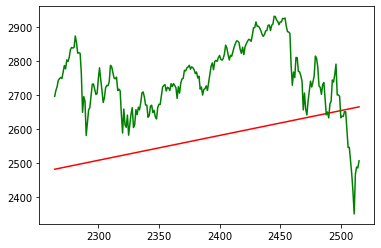

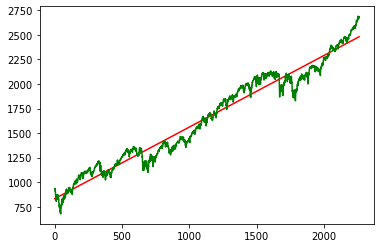

In [77]:
model = LinearRegression()
model.fit(np.array(train_x['Date']).reshape(-1, 1),train_y)

predict = model.predict(np.array(test_x['Date']).reshape(-1, 1))
plt.plot(test_x['Date'], predict, "r")
plt.plot(test_x['Date'], test_y, "g")
plt.show()

predict = model.predict(np.array(train_x['Date']).reshape(-1, 1))
plt.plot(train_x['Date'], predict, "r")
plt.plot(train_x['Date'], train_y, "g")
plt.show()

## 加分題

請將訓練後的模型套用至 [Kaggle Titanic](https://www.kaggle.com/c/titanic/overview) `test.csv` 上，並上傳至 Kaggle 進行評分，**截圖**後**嵌入**至 `markdown` 區塊中。

In [ ]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))